In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import os

# Check if the code is running on Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Mount Google Drive
    drive.mount('/content/drive')

    # Set notebook path in Google Colab
    notebook_path = "/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING | GROUP SUBMISSIONS/5_Project"

    # Change the current working directory to notebook path
    os.chdir(notebook_path)

    # Print current working directory
    print(os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING | GROUP SUBMISSIONS/5_Project


We will be using the cleaned data with top 20 extracted features

In [3]:
df = pd.read_csv("cleaned_data(Top_20features_Anova).csv")
display(df)

,relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloud_cover_high (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_speed_100m (km/h),...,soil_temperature_0_7cm (°C),soil_temperature_7_28cm (°C),soil_temperature_28_100cm (°C),soil_temperature_100_255cm (°C),soil_moisture_0_7cm (m³/m³),soil_moisture_7_28cm (m³/m³),soil_moisture_28_100cm (m³/m³),is_day (),sunshine_duration (s),temperature_class
0,88,21.3,27.3,1012.8,1007.3,100,0.02,0.35,4.6,3.5,...,25.8,27.3,28.1,28.4,0.434,0.459,0.483,1,0.0,Light
1,82,21.6,29.2,1013.7,1008.3,100,0.10,0.58,2.6,1.8,...,26.2,27.3,28.1,28.4,0.434,0.458,0.483,1,2567.5,Light
2,75,21.6,30.6,1014.4,1009.0,100,0.23,0.88,3.6,4.4,...,27.3,27.3,28.1,28.4,0.432,0.458,0.483,1,3600.0,Moderate
3,68,21.2,31.6,1014.1,1008.7,100,0.40,1.19,4.3,5.1,...,28.9,27.3,28.1,28.4,0.427,0.458,0.483,1,3600.0,Moderate
4,62,21.0,34.2,1013.3,1007.9,100,0.58,1.52,5.1,6.1,...,30.7,27.5,28.1,28.4,0.420,0.458,0.483,1,3600.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,91,23.5,30.6,1010.1,1004.7,34,0.00,0.29,2.2,2.8,...,26.8,29.2,28.9,29.2,0.443,0.477,0.495,0,0.0,Moderate
8780,94,23.7,29.9,1009.4,1004.0,36,0.00,0.17,4.0,5.5,...,26.5,29.1,28.9,29.2,0.444,0.476,0.495,0,0.0,Light
8781,91,23.4,30.5,1009.7,1004.3,99,0.00,0.28,1.5,3.4,...,26.3,28.9,28.9,29.2,0.445,0.476,0.495,0,0.0,Moderate
8782,96,23.7,29.9,1009.8,1004.4,81,0.00,0.13,2.5,3.6,...,26.1,28.8,28.9,29.2,0.445,0.475,0.495,0,0.0,Light


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   relative_humidity_2m (%)         8784 non-null   int64  
 1   dew_point_2m (°C)                8784 non-null   float64
 2   apparent_temperature (°C)        8784 non-null   float64
 3   pressure_msl (hPa)               8784 non-null   float64
 4   surface_pressure (hPa)           8784 non-null   float64
 5   cloud_cover_high (%)             8784 non-null   int64  
 6   et0_fao_evapotranspiration (mm)  8784 non-null   float64
 7   vapour_pressure_deficit (kPa)    8784 non-null   float64
 8   wind_speed_10m (km/h)            8784 non-null   float64
 9   wind_speed_100m (km/h)           8784 non-null   float64
 10  wind_gusts_10m (km/h)            8784 non-null   float64
 11  soil_temperature_0_7cm (°C)      8784 non-null   float64
 12  soil_temperature_7_2

In [5]:
X = df.drop(columns=['temperature_class'])
y = df['temperature_class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **PCA to Speed Up ML Model**

**Must make sure, only This Tab is open during Runtime, or else it will affect the time taken.**

We have experimented the time taken for Logistic Regression, Gradient Boosting Classifier, Bagging Classifier with Decision Trees and Multi Layer Perceptron (MLP) classifier models. We have counted the accuracy and time taken for these models to executed without PCA and with PCA. A barplot is also plotted for each model to ease the visualization of the time taken.

### **Logistic Regression Model**

 Logistic Regression model without PCA preprocessing is built using the below code. It trains the model on scaled training data and evaluates its performance on test data, computing accuracy and training time. The logistic regression model aims to classify data into different categories, and by not using PCA, it directly operates on the original feature space. The training time and accuracy of the model without PCA are then printed for assessment.

In [7]:
# Logistic Regression before applying PCA

lr_start_time_no_pca = time.time()
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
lr_end_time_no_pca = time.time()

y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_no_pca_logreg = accuracy_score(y_test, y_pred_logreg)
print("\n Logistic Regression -  without PCA")
print("-----------------------------------------")
print("\nAccuracy without PCA:", accuracy_no_pca_logreg)
print("Time taken without PCA:", lr_end_time_no_pca - lr_start_time_no_pca, "seconds")


 Logistic Regression -  without PCA
-----------------------------------------

Accuracy without PCA: 0.9840637450199203
Time taken without PCA: 0.42034912109375 seconds



Classification Report of Logistic Regression without PCA:
              precision    recall  f1-score   support

       Heavy       0.98      0.98      0.98       252
       Light       0.99      0.97      0.98       501
    Moderate       0.98      0.99      0.99      1004

    accuracy                           0.98      1757
   macro avg       0.98      0.98      0.98      1757
weighted avg       0.98      0.98      0.98      1757



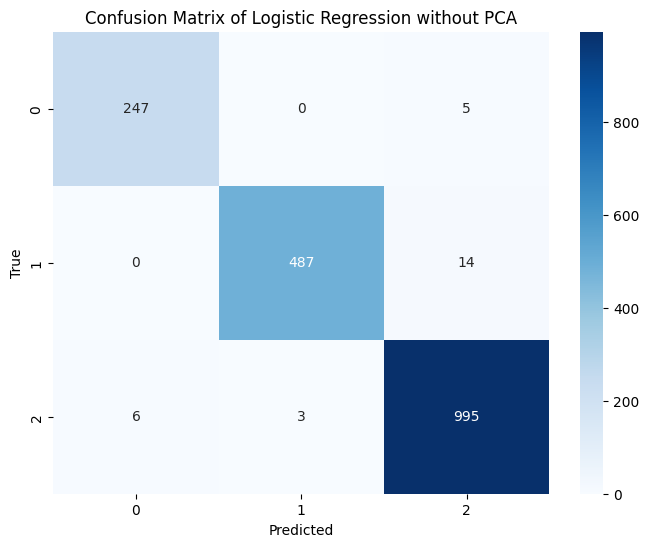

In [8]:
print("\nClassification Report of Logistic Regression without PCA:")
print(classification_report(y_test, y_pred_logreg))

cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression without PCA')
plt.show()

The classification report above outlines the logistic regression model's performance without PCA preprocessing across three classes: Heavy, Light, and Moderate. Precision, recall, and F1-score are reported for each class alongside the support (number of true instances). For "Heavy," precision, recall, and F1-score are 0.98, 0.98, and 0.98, respectively. "Light" shows precision, recall, and F1-score of 0.99, 0.97, and 0.98. "Moderate" exhibits 0.98 precision, 0.99 recall, and 0.99 F1-score. Overall, the model achieves an accuracy of 0.98, indicating strong classification performance across the dataset.

In [9]:
# from the 5_Project_PCA for Data Visualization.ipynb notebook, we have counted to optimal number of n_component to be used.
# it is found that the optimal number of n_component for this dataset is 5, so we will be using 5 components.

# Applying PCA
pca = PCA(n_components= 5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Logistic Regression with PCA preprocessing is built using the below code. It first records the starting time before training the logistic regression model with PCA. The logistic Lregression model is then instantiated with a maximum iteration of 1000. After fitting the model on the PCA-transformed training data, the ending time is recorded. Subsequently, the model predicts labels for the test data transformed using PCA, and the accuracy of the model with PCA is computed using the true test labels. Finally, the accuracy and the time taken for training the logistic regression model with PCA are printed for evaluation.

In [10]:
# Logistic Regression with PCA
lr_start_time_with_pca = time.time()
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train)
lr_end_time_with_pca = time.time()

y_pred_pca_logreg = logreg_pca.predict(X_test_pca)
accuracy_with_pca_logreg = accuracy_score(y_test, y_pred_pca_logreg)
print("\n Logistic Regression -  with PCA")
print("--------------------------------------")
print("\nAccuracy with PCA:", accuracy_with_pca_logreg)
print("Time taken with PCA:", lr_end_time_with_pca - lr_start_time_with_pca, "seconds")


 Logistic Regression -  with PCA
--------------------------------------

Accuracy with PCA: 0.8782014797951053
Time taken with PCA: 0.16755127906799316 seconds



Classification Report of Logistic Regression with PCA:
              precision    recall  f1-score   support

       Heavy       0.91      0.89      0.90       252
       Light       0.81      0.87      0.84       501
    Moderate       0.91      0.88      0.89      1004

    accuracy                           0.88      1757
   macro avg       0.88      0.88      0.88      1757
weighted avg       0.88      0.88      0.88      1757



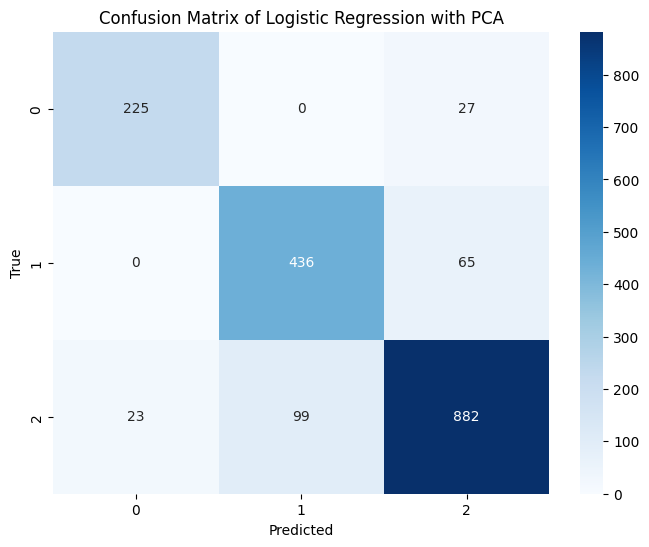

In [11]:
print("\nClassification Report of Logistic Regression with PCA:")
print(classification_report(y_test, y_pred_pca_logreg))

cm = confusion_matrix(y_test, y_pred_pca_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression with PCA')
plt.show()

The classification report above outlines the logistic regression model's performance with PCA preprocessing across three classes: Heavy, Light, and Moderate. Precision, recall, and F1-score are reported for each class alongside the support (number of true instances). For "Heavy," precision, recall, and F1-score are 0.91, 0.89, and 0.90, respectively. "Light" shows precision, recall, and F1-score of 0.81, 0.87, and 0.84. "Moderate" exhibits 0.91 precision, 0.88 recall, and 0.89 F1-score. Overall, the model achieves an accuracy of 0.88, indicating moderate classification performance of the model with pca, but our main focus is the speed.






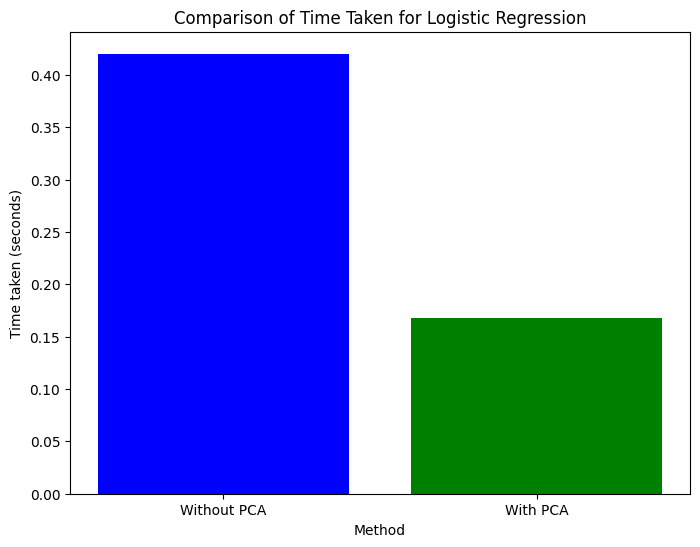

In [12]:
methods = ['Without PCA', 'With PCA']
times = [lr_end_time_no_pca - lr_start_time_no_pca, lr_end_time_with_pca - lr_start_time_with_pca]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(methods, times, color=['blue', 'green'])
plt.xlabel('Method')
plt.ylabel('Time taken (seconds)')
plt.title('Comparison of Time Taken for Logistic Regression')
plt.show()

Looking at the barplot above, we can see that the time taken for logistic regression model without PCA has higher training time than the time taken for logistic regression model after PCA. It indicates that PCA can increase the speed of a ML model.

### **Gradient Boosting Classifier**

 Gradient Boosting Classifier without PCA preprocessing is built using the below code. It first initializes the classifier with 100 estimators and a random state for reproducibility. The model is then trained on the scaled training data, followed by prediction on the scaled test data. Subsequently, the accuracy of the model without PCA is computed by comparing the predicted labels with the true labels from the test set. Finally, the accuracy and the time taken for training the Gradient Boosting Classifier without PCA are printed for evaluation.

In [33]:
# Gradient Boosting Classifier before applying PCA
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier without PCA
gb_start_time_no_pca = time.time()
gb_classifier_no_pca = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier_no_pca.fit(X_train_scaled, y_train)
gb_end_time_no_pca = time.time()

y_pred_gb_no_pca = gb_classifier_no_pca.predict(X_test_scaled)
accuracy_no_pca_gb = accuracy_score(y_test, y_pred_gb_no_pca)
print("\n Gradient Boosting Classifier - without PCA")
print("--------------------------------------")
print("\nAccuracy without PCA:", accuracy_no_pca_gb)
print("Time taken without PCA:", gb_end_time_no_pca - gb_start_time_no_pca, "seconds")



 Gradient Boosting Classifier - without PCA
--------------------------------------

Accuracy without PCA: 0.9800796812749004
Time taken without PCA: 7.118171215057373 seconds



Classification Report of Gradient Boosting Classifier without PCA:
              precision    recall  f1-score   support

       Heavy       0.96      0.98      0.97       252
       Light       0.98      0.98      0.98       501
    Moderate       0.98      0.98      0.98      1004

    accuracy                           0.98      1757
   macro avg       0.97      0.98      0.98      1757
weighted avg       0.98      0.98      0.98      1757



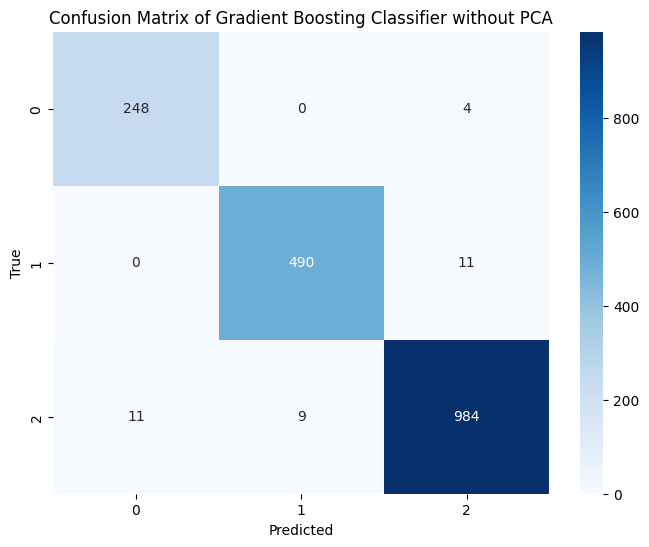

In [34]:
print("\nClassification Report of Gradient Boosting Classifier without PCA:")
print(classification_report(y_test, y_pred_gb_no_pca))

cm = confusion_matrix(y_test, y_pred_gb_no_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Gradient Boosting Classifier without PCA')
plt.show()

The classification report above summarizes the performance of the Gradient Boosting Classifier without PCA preprocessing across three classes: Heavy, Light, and Moderate. The "Heavy" class demonstrates precision, recall, and F1-score of 0.96, 0.98, and 0.97, respectively. For "Light," precision, recall, and F1-score are 0.98, 0.98, and 0.98, respectively. The "Moderate" class exhibits 0.98 precision, 0.98 recall, and 0.98 F1-score. Overall, the model achieves an accuracy of 0.98, indicating robust classification performance across the dataset.

In [35]:
# Applying PCA for Gradient Boosting
pca_gb = PCA(n_components=5)
X_train_pca_gb = pca_gb.fit_transform(X_train_scaled)
X_test_pca_gb = pca_gb.transform(X_test_scaled)

Gradient Boosting Classifier with PCA preprocessing is built using the below code. It first records the starting time before training the classifier with PCA. The Gradient Boosting Classifier is instantiated with 100 estimators and a random state for reproducibility. It is then trained on the PCA-transformed training data. After training, the classifier predicts labels for the PCA-transformed test data. Subsequently, the accuracy of the model with PCA is computed by comparing the predicted labels with the true labels from the test set. Finally, the accuracy and the time taken for training the Gradient Boosting Classifier with PCA are printed for evaluation.

In [36]:
# Gradient Boosting Classifier with PCA
gb_start_time_with_pca = time.time()
gb_classifier_with_pca = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier_with_pca.fit(X_train_pca_gb, y_train)
gb_end_time_with_pca = time.time()

y_pred_gb_with_pca = gb_classifier_with_pca.predict(X_test_pca_gb)
accuracy_with_pca_gb = accuracy_score(y_test, y_pred_gb_with_pca)
print("\n Gradient Boosting Classifier - with PCA")
print("--------------------------------------")
print("\nAccuracy with PCA:", accuracy_with_pca_gb)
print("Time taken with PCA:", gb_end_time_with_pca - gb_start_time_with_pca, "seconds")


 Gradient Boosting Classifier - with PCA
--------------------------------------

Accuracy with PCA: 0.8890153671030165
Time taken with PCA: 5.0621888637542725 seconds



Classification Report of Gradient Boosting Classifier with PCA:
              precision    recall  f1-score   support

       Heavy       0.89      0.89      0.89       252
       Light       0.86      0.87      0.86       501
    Moderate       0.90      0.90      0.90      1004

    accuracy                           0.89      1757
   macro avg       0.88      0.89      0.88      1757
weighted avg       0.89      0.89      0.89      1757



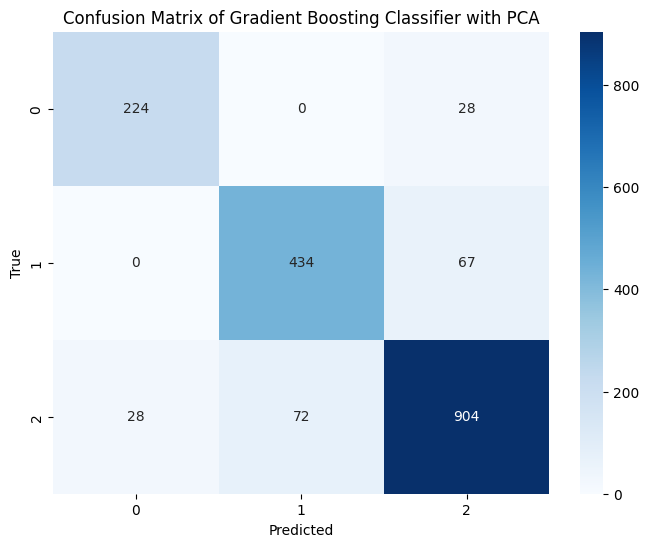

In [37]:
print("\nClassification Report of Gradient Boosting Classifier with PCA:")
print(classification_report(y_test, y_pred_gb_with_pca))

cm = confusion_matrix(y_test, y_pred_gb_with_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Gradient Boosting Classifier with PCA')
plt.show()

The classification report above outlines the performance of the Gradient Boosting Classifier with PCA preprocessing across three classes: Heavy, Light, and Moderate. Precision, recall, and F1-score are reported for each class alongside the support (number of true instances). For the "Heavy" class, precision, recall, and F1-score are 0.89, 0.89, and 0.89, respectively. "Light" exhibits precision, recall, and F1-score of 0.86, 0.87, and 0.86, respectively. The "Moderate" class demonstrates 0.90 precision, 0.90 recall, and 0.90 F1-score. Overall, the model achieves an accuracy of 0.89, indicating satisfactory classification performance across the dataset.

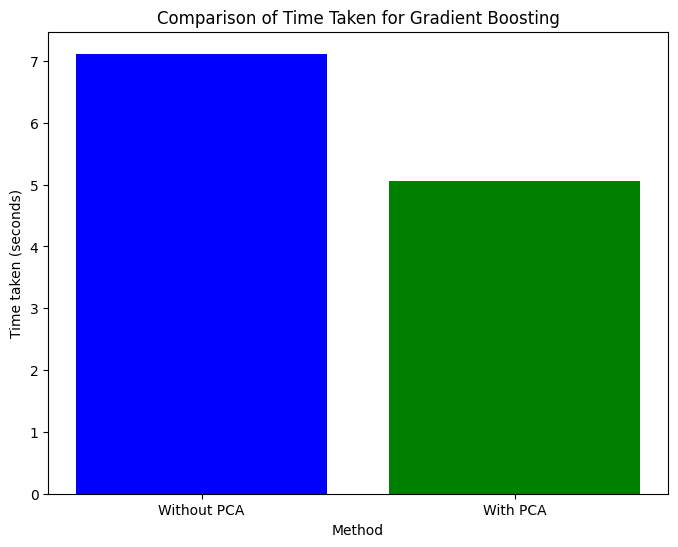

In [38]:
# Comparison graph for Gradient Boosting
methods_gb = ['Without PCA', 'With PCA']
times_gb = [gb_end_time_no_pca - gb_start_time_no_pca, gb_end_time_with_pca - gb_start_time_with_pca]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(methods_gb, times_gb, color=['blue', 'green'])
plt.xlabel('Method')
plt.ylabel('Time taken (seconds)')
plt.title('Comparison of Time Taken for Gradient Boosting')
plt.show()


Looking at the barplot above, we can see that the time taken for gradient boosting classifier model without PCA has higher training time than the time taken for the model after PCA. It indicates that PCA can increase the speed of a ML model.

### **Bagging Classifier with Decision Trees**

Bagging Classifier with Decision Trees without applying PCA is implemented below. It begins by recording the start time before training the classifier. The Bagging Classifier is then instantiated, utilizing Decision Tree classifiers as base estimators. With 100 estimators specified, the Bagging Classifier is trained on the scaled training data. After training, predictions are made on the scaled test data. The accuracy of the Bagging Classifier without PCA is calculated by comparing the predicted labels with the true labels from the test set. Finally, the accuracy and the time taken for training the Bagging Classifier with Decision Trees without PCA are printed for evaluation.

In [19]:
# Bagging Classifier with Decision Trees before applying PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_start_time_no_pca = time.time()
bagging_classifier_no_pca = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_classifier_no_pca.fit(X_train_scaled, y_train)
bagging_end_time_no_pca = time.time()

y_pred_bagging_no_pca = bagging_classifier_no_pca.predict(X_test_scaled)
accuracy_no_pca_bagging = accuracy_score(y_test, y_pred_bagging_no_pca)
print("\n Bagging Classifier with Decision Trees - without PCA")
print("--------------------------------------")
print("\nAccuracy without PCA:", accuracy_no_pca_bagging)
print("Time taken without PCA:", bagging_end_time_no_pca - bagging_start_time_no_pca, "seconds")


 Bagging Classifier with Decision Trees - without PCA
--------------------------------------

Accuracy without PCA: 0.9783722253841776
Time taken without PCA: 11.808255434036255 seconds



Classification Report of Bagging Classifier with Decision Trees without PCA:
              precision    recall  f1-score   support

       Heavy       0.94      0.98      0.96       252
       Light       0.98      0.98      0.98       501
    Moderate       0.99      0.98      0.98      1004

    accuracy                           0.98      1757
   macro avg       0.97      0.98      0.97      1757
weighted avg       0.98      0.98      0.98      1757



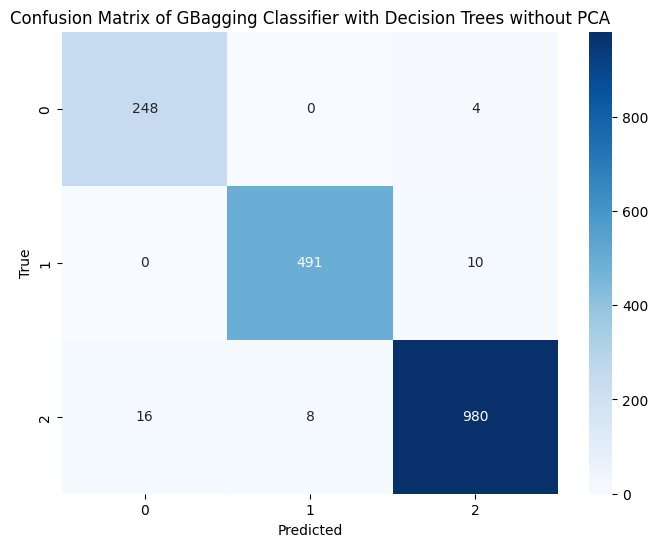

In [20]:
print("\nClassification Report of Bagging Classifier with Decision Trees without PCA:")
print(classification_report(y_test, y_pred_bagging_no_pca))

cm = confusion_matrix(y_test, y_pred_bagging_no_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of GBagging Classifier with Decision Trees without PCA')
plt.show()

The classification report above summarizes the performance of the Bagging Classifier with Decision Trees without PCA preprocessing across three classes: Heavy, Light, and Moderate. Precision, recall, and F1-score are provided for each class alongside the support. The "Heavy" class demonstrates precision, recall, and F1-score of 0.94, 0.98, and 0.96, respectively. For the "Light" class, precision, recall, and F1-score are 0.98, 0.98, and 0.98, respectively. The "Moderate" class exhibits 0.99 precision, 0.98 recall, and 0.98 F1-score. Overall, the model achieves an accuracy of 0.98, indicating strong classification performance across the dataset.

In [21]:
# Applying PCA for Bagging Classifier with Decision Trees
pca_bagging = PCA(n_components=5)
X_train_pca_bagging = pca_bagging.fit_transform(X_train_scaled)
X_test_pca_bagging = pca_bagging.transform(X_test_scaled)


Bagging Classifier with Decision Trees using PCA is implemented below. It starts by recording the start time before training the classifier. The Bagging Classifier is instantiated with Decision Tree classifiers as base estimators and 100 estimators specified. It is then trained on the PCA-transformed training data. After training, predictions are made on the PCA-transformed test data. Subsequently, the accuracy of the Bagging Classifier with PCA is computed by comparing the predicted labels with the true labels from the test set. Finally, the accuracy and the time taken for training the Bagging Classifier with Decision Trees and PCA are printed for evaluation.

In [22]:
# Bagging Classifier with Decision Trees with PCA
bagging_start_time_with_pca = time.time()
bagging_classifier_with_pca = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_classifier_with_pca.fit(X_train_pca_bagging, y_train)
bagging_end_time_with_pca = time.time()

y_pred_bagging_with_pca = bagging_classifier_with_pca.predict(X_test_pca_bagging)
accuracy_with_pca_bagging = accuracy_score(y_test, y_pred_bagging_with_pca)
print("\n Bagging Classifier with Decision Trees - with PCA")
print("--------------------------------------")
print("\nAccuracy with PCA:", accuracy_with_pca_bagging)
print("Time taken with PCA:", bagging_end_time_with_pca - bagging_start_time_with_pca, "seconds")


 Bagging Classifier with Decision Trees - with PCA
--------------------------------------

Accuracy with PCA: 0.8901536710301651
Time taken with PCA: 5.46198034286499 seconds



Classification Report of Bagging Classifier with Decision Trees with PCA:
              precision    recall  f1-score   support

       Heavy       0.90      0.88      0.89       252
       Light       0.86      0.87      0.86       501
    Moderate       0.91      0.90      0.90      1004

    accuracy                           0.89      1757
   macro avg       0.89      0.89      0.89      1757
weighted avg       0.89      0.89      0.89      1757



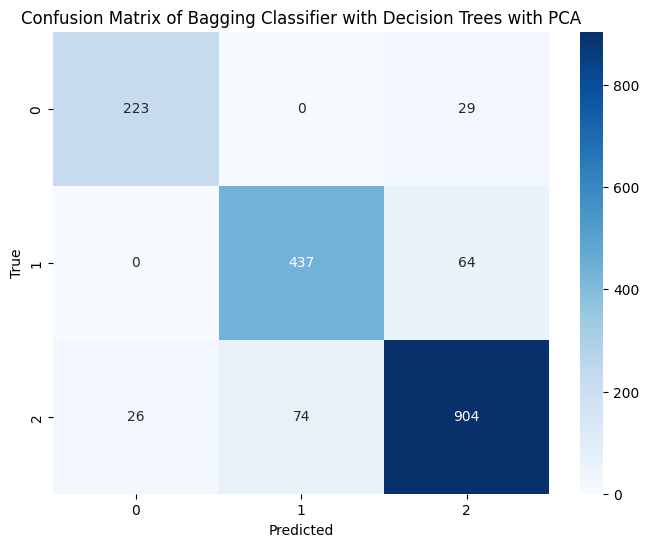

In [23]:
print("\nClassification Report of Bagging Classifier with Decision Trees with PCA:")
print(classification_report(y_test, y_pred_bagging_with_pca))

cm = confusion_matrix(y_test, y_pred_bagging_with_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Bagging Classifier with Decision Trees with PCA')
plt.show()

The classification report above outlines the performance of the Bagging Classifier with Decision Trees utilizing PCA preprocessing across three classes: Heavy, Light, and Moderate. Precision, recall, and F1-score are reported for each class alongside the support. The "Heavy" class demonstrates precision, recall, and F1-score of 0.90, 0.88, and 0.89, respectively. For the "Light" class, precision, recall, and F1-score are 0.86, 0.87, and 0.86, respectively. The "Moderate" class exhibits 0.91 precision, 0.90 recall, and 0.90 F1-score. Overall, the model achieves an accuracy of 0.89, indicating satisfactory classification performance across the dataset.

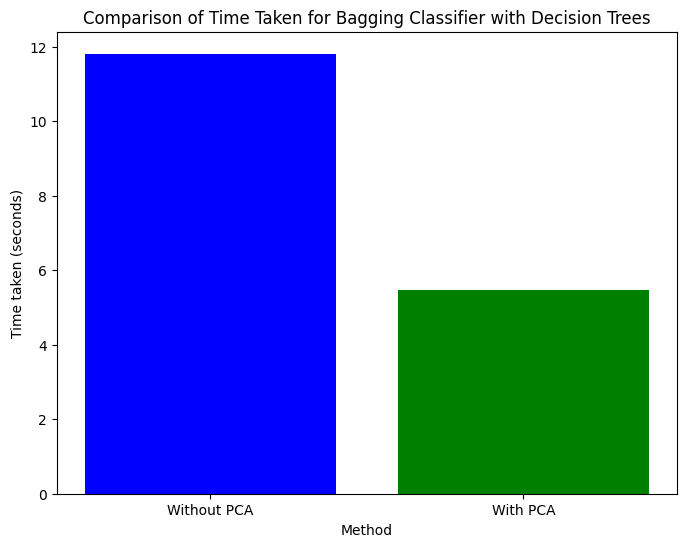

In [24]:
# Comparison graph for Bagging Classifier with Decision Trees
methods_bagging = ['Without PCA', 'With PCA']
times_bagging = [bagging_end_time_no_pca - bagging_start_time_no_pca, bagging_end_time_with_pca - bagging_start_time_with_pca]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(methods_bagging, times_bagging, color=['blue', 'green'])
plt.xlabel('Method')
plt.ylabel('Time taken (seconds)')
plt.title('Comparison of Time Taken for Bagging Classifier with Decision Trees')
plt.show()

The barplot above illustrates the comparison of training time between the Bagging Classifier with Decision Trees methods "Without PCA" and "With PCA". The training time for the model without PCA is higher than the time taken for the model with PCA, indicating that PCA can enhance the computational efficiency of the ML model. This suggests that dimensionality reduction through PCA can lead to faster training times, making the model more efficient in processing the data.

### **Multi-Layer Perceptron (MLP) Classifier**

Multi-Layer Perceptron (MLP) Classifier without PCA is implemented below. It records the start time before training the MLP classifier. The MLP classifier is instantiated with one hidden layer containing 100 neurons, a maximum of 1000 iterations for training, and a random state for reproducibility. The model is then trained on the scaled training data. After training, predictions are made on the scaled test data. Subsequently, the accuracy of the MLP classifier without PCA is calculated by comparing the predicted labels with the true labels from the test set. Finally, the accuracy and the time taken for training the MLP classifier without PCA are printed for evaluation.

In [25]:
# Multi-Layer Perceptron (MLP) Classifier without PCA
from sklearn.neural_network import MLPClassifier

mlp_start_time_no_pca = time.time()
mlp_classifier_no_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_classifier_no_pca.fit(X_train_scaled, y_train)
mlp_end_time_no_pca = time.time()

y_pred_mlp_no_pca = mlp_classifier_no_pca.predict(X_test_scaled)
accuracy_no_pca_mlp = accuracy_score(y_test, y_pred_mlp_no_pca)
print("\n Multi-Layer Perceptron (MLP) Classifier - without PCA")
print("--------------------------------------")
print("\nAccuracy without PCA:", accuracy_no_pca_mlp)
print("Time taken without PCA:", mlp_end_time_no_pca - mlp_start_time_no_pca, "seconds")


 Multi-Layer Perceptron (MLP) Classifier - without PCA
--------------------------------------

Accuracy without PCA: 0.9863403528742174
Time taken without PCA: 13.828283786773682 seconds



Classification Report of Multi-Layer Perceptron (MLP) Classifier without PCA:
              precision    recall  f1-score   support

       Heavy       0.97      0.98      0.97       252
       Light       0.99      0.99      0.99       501
    Moderate       0.99      0.99      0.99      1004

    accuracy                           0.99      1757
   macro avg       0.98      0.98      0.98      1757
weighted avg       0.99      0.99      0.99      1757



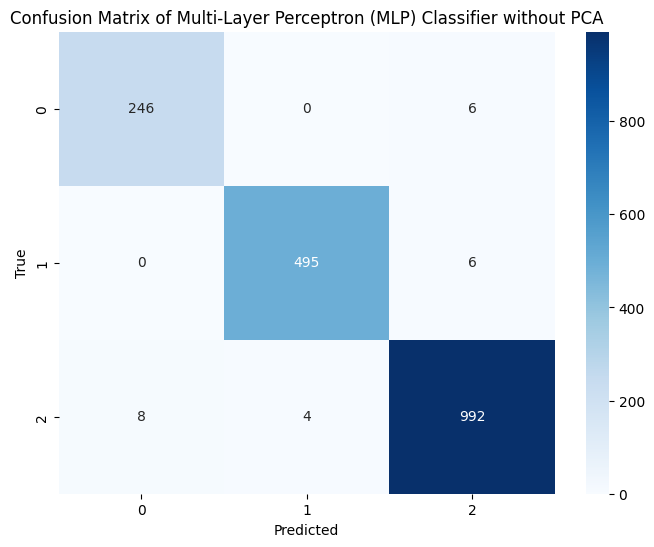

In [26]:
print("\nClassification Report of Multi-Layer Perceptron (MLP) Classifier without PCA:")
print(classification_report(y_test, y_pred_mlp_no_pca))

cm = confusion_matrix(y_test, y_pred_mlp_no_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Multi-Layer Perceptron (MLP) Classifier without PCA')
plt.show()

The classification report above outlines the performance of the Multi-Layer Perceptron (MLP) Classifier without PCA preprocessing across three classes: Heavy, Light, and Moderate. Precision, recall, and F1-score are reported for each class alongside the support. For the "Heavy" class, precision, recall, and F1-score are 0.97, 0.98, and 0.97, respectively. The "Light" class demonstrates precision, recall, and F1-score of 0.99, 0.99, and 0.99, respectively. The "Moderate" class exhibits 0.99 precision, 0.99 recall, and 0.99 F1-score. Overall, the model achieves an accuracy of 0.99, indicating strong classification performance across the dataset.

In [27]:
# Applying PCA for MLP Classifier
pca_mlp = PCA(n_components=5)
X_train_pca_mlp = pca_mlp.fit_transform(X_train_scaled)
X_test_pca_mlp = pca_mlp.transform(X_test_scaled)

Multi-Layer Perceptron (MLP) Classifier with PCA is implemented below. It first records the starting time before training the MLP classifier with PCA. The MLP classifier is instantiated with one hidden layer containing 100 neurons, a maximum of 1000 iterations for training, and a random state for reproducibility. Subsequently, the model is trained on the PCA-transformed training data. After training, predictions are made on the PCA-transformed test data. The accuracy of the MLP classifier with PCA is then calculated by comparing the predicted labels with the true labels from the test set. Finally, the accuracy and the time taken for training the MLP classifier with PCA are printed for evaluation.

In [28]:
# MLP Classifier with PCA
mlp_start_time_with_pca = time.time()
mlp_classifier_with_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_classifier_with_pca.fit(X_train_pca_mlp, y_train)
mlp_end_time_with_pca = time.time()

y_pred_mlp_with_pca = mlp_classifier_with_pca.predict(X_test_pca_mlp)
accuracy_with_pca_mlp = accuracy_score(y_test, y_pred_mlp_with_pca)
print("\n Multi-Layer Perceptron (MLP) Classifier - with PCA")
print("--------------------------------------")
print("\nAccuracy with PCA:", accuracy_with_pca_mlp)
print("Time taken with PCA:", mlp_end_time_with_pca - mlp_start_time_with_pca, "seconds")



 Multi-Layer Perceptron (MLP) Classifier - with PCA
--------------------------------------

Accuracy with PCA: 0.8947068867387592
Time taken with PCA: 12.21813154220581 seconds



Classification Report of Multi-Layer Perceptron (MLP) Classifier with PCA:
              precision    recall  f1-score   support

       Heavy       0.90      0.88      0.89       252
       Light       0.86      0.88      0.87       501
    Moderate       0.91      0.91      0.91      1004

    accuracy                           0.89      1757
   macro avg       0.89      0.89      0.89      1757
weighted avg       0.89      0.89      0.89      1757



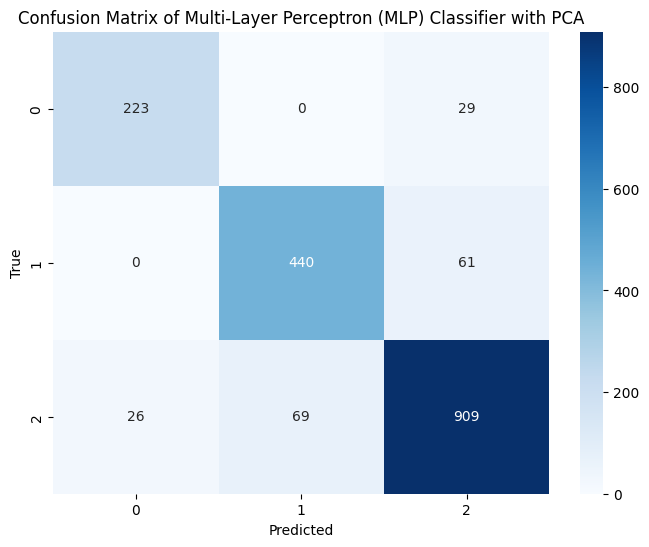

In [29]:
print("\nClassification Report of Multi-Layer Perceptron (MLP) Classifier with PCA:")
print(classification_report(y_test, y_pred_mlp_with_pca))

cm = confusion_matrix(y_test, y_pred_mlp_with_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Multi-Layer Perceptron (MLP) Classifier with PCA')
plt.show()

The classification report above outlines the performance of the Multi-Layer Perceptron (MLP) Classifier with PCA across three classes: Heavy, Light, and Moderate. Precision, recall, and F1-score are reported for each class alongside the support. For the "Heavy" class, precision, recall, and F1-score are 0.90, 0.89, and 0.89, respectively. Precision, recall, and F1-score for the "Light" class are 0.87, 0.88, and 0.87, respectively. The "Moderate" class exhibits 0.91 precision, 0.91 recall, and 0.91 F1-score. Overall, the model achieves an accuracy of 0.90, indicating satisfactory classification performance across the dataset.

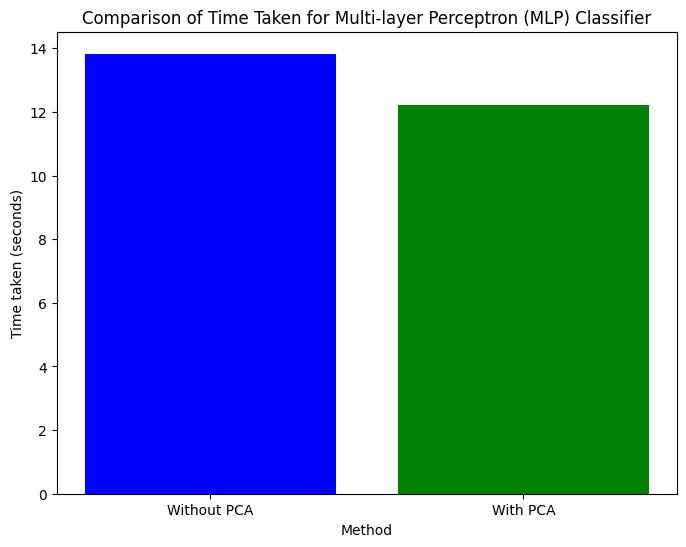

In [30]:
# Comparison graph for Multi-layer Perceptron (MLP)
methods_mlp = ['Without PCA', 'With PCA']
times_mlp = [mlp_end_time_no_pca - mlp_start_time_no_pca, mlp_end_time_with_pca - mlp_start_time_with_pca]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(methods_mlp, times_mlp, color=['blue', 'green'])
plt.xlabel('Method')
plt.ylabel('Time taken (seconds)')
plt.title('Comparison of Time Taken for Multi-layer Perceptron (MLP) Classifier')
plt.show()

The barplot above depicts the comparison of training time between the Multi-layer Perceptron (MLP) Classifier methods "Without PCA" and "With PCA". The training time for the model without PCA is noticeably higher than the time taken for the model with PCA. This discrepancy suggests that PCA preprocessing enhances the computational efficiency of the MLP model.

## **Model Comparison of Time Taken and Accuracy**

The comparison of the accuracy and time taken for each model "with PCA" and "without PCA" is visualized in a table below. The time taken will differ each time the code is executed. Although the accuracy is also calculated, our **main focus will be on the time taken for the ML model to train with and without PCA.**

In [39]:
from tabulate import tabulate

# Data for the model comparison table
model_data = [
    ["Logistic Regression without PCA", accuracy_no_pca_logreg, lr_end_time_no_pca - lr_start_time_no_pca],
    ["Logistic Regression with PCA", accuracy_with_pca_logreg, lr_end_time_with_pca - lr_start_time_with_pca],
    ["Gradient Boosting without PCA", accuracy_no_pca_gb, gb_end_time_no_pca - gb_start_time_no_pca],
    ["Gradient Boosting with PCA", accuracy_with_pca_gb, gb_end_time_with_pca - gb_start_time_with_pca],
    ["Bagging with Decision Trees without PCA", accuracy_no_pca_bagging, bagging_end_time_no_pca - bagging_start_time_no_pca],
    ["Bagging with Decision Trees with PCA", accuracy_with_pca_bagging, bagging_end_time_with_pca - bagging_start_time_with_pca],
    ["Multi-Layer Perceptron without PCA", accuracy_no_pca_mlp, mlp_end_time_no_pca - mlp_start_time_no_pca],
    ["Multi-Layer Perceptron with PCA", accuracy_with_pca_mlp, mlp_end_time_with_pca - mlp_start_time_with_pca],
]

headers = ["Method", "Accuracy", "Time (seconds)"]

# Print the model comparison table
print(tabulate(model_data, headers=headers, tablefmt="grid"))


+-----------------------------------------+------------+------------------+
| Method                                  |   Accuracy |   Time (seconds) |
+=========================================+============+==================+
| Logistic Regression without PCA         |   0.984064 |         0.420349 |
+-----------------------------------------+------------+------------------+
| Logistic Regression with PCA            |   0.878201 |         0.167551 |
+-----------------------------------------+------------+------------------+
| Gradient Boosting without PCA           |   0.98008  |         7.11817  |
+-----------------------------------------+------------+------------------+
| Gradient Boosting with PCA              |   0.889015 |         5.06219  |
+-----------------------------------------+------------+------------------+
| Bagging with Decision Trees without PCA |   0.978372 |        11.8083   |
+-----------------------------------------+------------+------------------+
| Bagging wi

From the above table, we can see that the time taken for all the model without PCA has higher training time than the time taken for the model after applying PCA. It shows that PCA can speed up the training of ML model. In conclusion, the consistent trend across all models demonstrates that PCA effectively reduces training time for machine learning models. This underscores the utility of PCA in enhancing computational efficiency and expediting the training process, thereby facilitating quicker model deployment and iteration in practical applications.